## Multiple Linear Regression

### Bike Sharing Assignment

### Problem Statement :- 

`BoomBikes` wants to know :-
 - Which variables/features are significant in predicting the demand for shared bikes ?
 - How well those variables describe the bike demands ?

## Step 1: Reading and Understanding the Data

In [282]:
# Importing Basic Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress Warnings

import warnings
warnings.filterwarnings('ignore')

In [283]:
# Reading the data set

day = pd.read_csv('../input/boom-bike-dataset/bike_sharing_data.csv')

In [284]:
# Head of 'day' dataset

day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [285]:
# Shape of 'day' data set

day.shape

(730, 16)

In [286]:
# Summary of 'day' data set

day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Dropping unnecessary columns

- Dropping `instant` column since its only a row indicator 
- Dropping `dteday` column since its info is available via other columns
- Dropping `casual` & `registered` columns since there collated info is available via `cnt`


In [287]:
day = day.drop(['instant','dteday','casual','registered'],axis=1)

In [288]:
# Updated summary of 'day' data set

day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Step 2: Visualising the Data

#### Correlation between pairs of variables

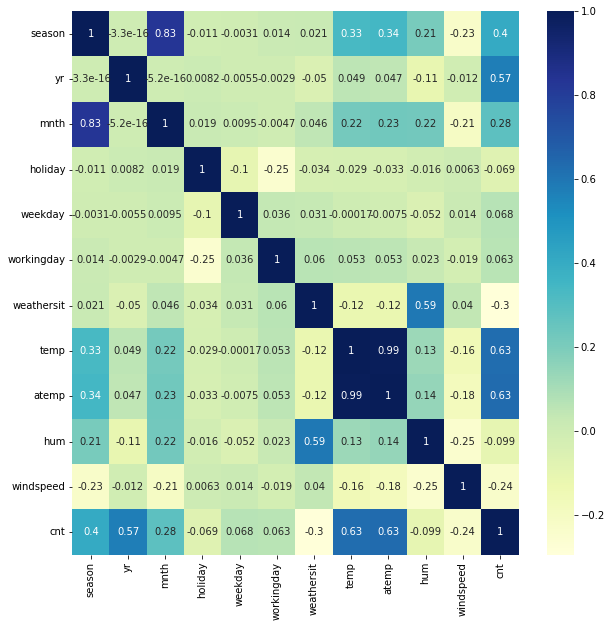

In [289]:
plt.figure(figsize=(10,10))
sns.heatmap(day.corr(),cmap="YlGnBu", annot = True)
plt.show()

- Here <b>cnt</b> has fairly good correlation with `season`,`yr`,`temp` and `atemp`.
- <b>hum</b> is correlated to `weathersit`.
- <b>atemp</b> and <b>temp</b> are very highly correlated . May be we will retain only one of them
- <b>mnth</b> and <b>season</b> are also very highly correlated . May be we will keep only one of them.

#### Scatter plot between continous variables and target variable ( 'cnt' )

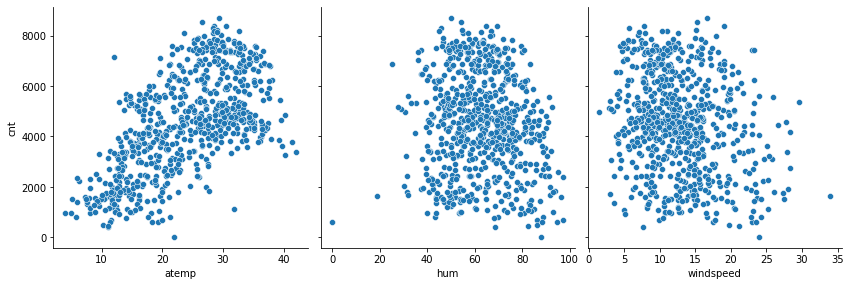

In [290]:
sns.pairplot(day, x_vars=['atemp', 'hum', 'windspeed'], y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()

- Here we see that `atemp` and `cnt` are linearly dependent. Using this we will proceed with creating 'linear Model'.

#### Visualising Categorical Variables

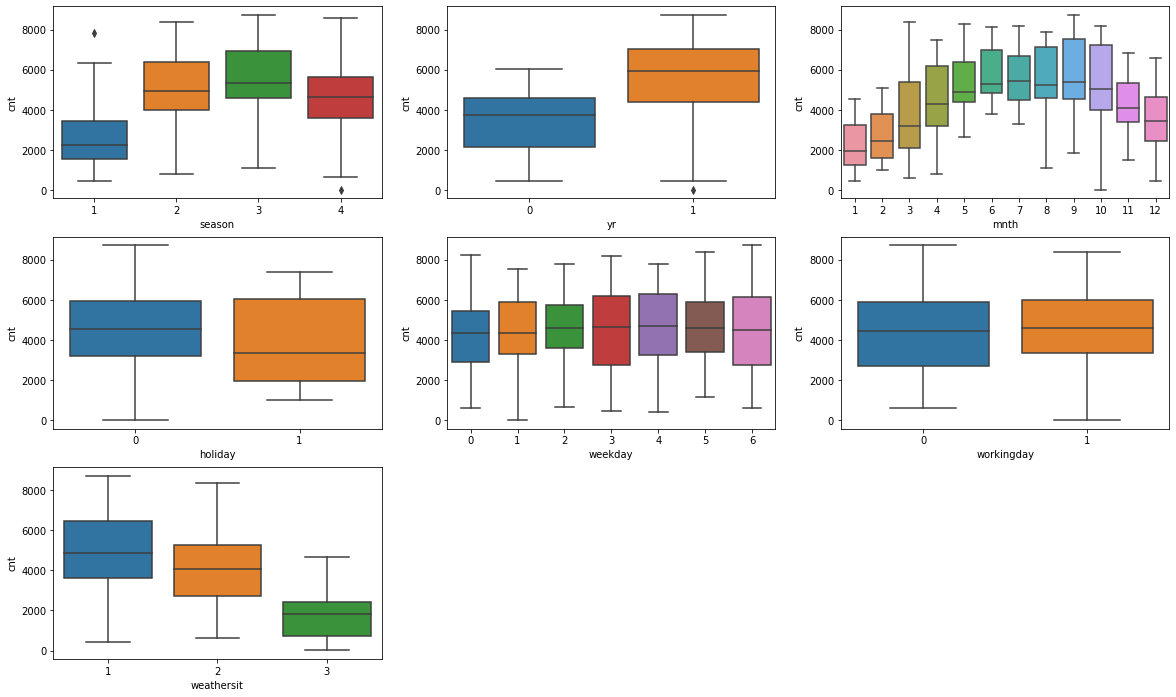

In [291]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.show()

- Looks like `season` <b>summer</b> and <b>fall</b> attract more demand compared to <b>spring</b> and <b>winter</b> .
- 2019 has seen more demand than 2018 ( `yr` ) .
- Here we once again see that `mnth` and `season` depict same behaviour and months corresponding to <b>summer</b> and   <b>fall</b> attract more demand compared to <b>spring</b> and <b>winter</b> . 
- Supprisingly <b>Holiday</b> or <b>No Holiday</b> does not show significant change in demand. 
- <b>Week of the day</b> does not show significant change in demand.All appear to be in same range.
- <b>Working Day</b> or <b>Non Working Day</b> does not show significant change in demand.
- <b>weathersit ( Weather Situation )</b> shows some different behaviour for different values. `Clear Day` has more     demand than `Cloudy` and `Cloudy` has more demand than `Light Snow And Rain` .

## Step 3: Data Preparation

### Creating dummy variables for categorical columns

#### Dummy variable for `season` column

In [292]:
seasons = pd.get_dummies(day['season'] , drop_first=True)

# Add the results to the original day data set

day = pd.concat([day,seasons] , axis=1)

# Rename column 2 as summer , 3 as fall , 4 as winter

day = day.rename(columns={2:"summer",3:"fall",4:"winter"})

- summer '0' ,fall '0' , winter '0' will become spring

In [293]:
# Dropping original 'season' variable

day = day.drop(['season'],axis=1)

In [294]:
# Head of our new data set.

day.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


#### Dummy variable for `mnth` column

In [295]:
months = pd.get_dummies(day['mnth'] , drop_first=True)

# Add the results to the original day data set

day = pd.concat([day,months] , axis=1)

# Rename column 2 as feb , 3 as march , 4 as april and so on

day = day.rename(columns={2:"feb",3:"march",4:"april",5:"may",6:"june",7:"july",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"})

- January is all other months 0

In [296]:
# Dropping original 'mnth' variable

day = day.drop(['mnth'],axis=1)

In [297]:
# Head of our new data set.

day.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,march,april,may,june,july,aug,sep,oct,nov,dec
0,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


#### Dummy variable for `weekday` column

In [298]:
# Change '0' to sun , '1' to 'mon' ,'2' to 'tue' ... in weekday column

day['weekday'] = day['weekday'].map({0:"sun",1:"mon",2:"tue",3:"wed",4:"thur",5:"fri",6:"sat"})

weekdays = pd.get_dummies(day['weekday'] , drop_first=True)

# Add the results to the original day data set

day = pd.concat([day,weekdays] , axis=1)

# Dropping original 'weekday' variable

day = day.drop(['weekday'],axis=1)

# Head of our new data set.

day.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,...,sep,oct,nov,dec,mon,sat,sun,thur,tue,wed
0,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,0,0,1


#### Dummy variable for `weathersit` column

In [299]:
# Existing 'weathersit' values

day['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [300]:
# Change '1' to clear , '2' to 'cloudy' ,'3' to 'light sr' ,'4' to 'heavy sr'... in weathersit column

day['weathersit'] = day['weathersit'].map({1:"clear",2:"cloudy",3:"light sr",4:"heavy sr"})

weathersits = pd.get_dummies(day['weathersit'] , drop_first=True)

# Add the results to the original day data set

day = pd.concat([day,weathersits] , axis=1)

# Dropping original 'weathersit' variable

day = day.drop(['weathersit'],axis=1)

# Head of our new data set.

day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,nov,dec,mon,sat,sun,thur,tue,wed,cloudy,light sr
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [301]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)

# Train-test split

day_train, day_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

In [302]:
from sklearn.preprocessing import MinMaxScaler

# Performing MinMax Scaling

minMaxScaler = MinMaxScaler()

In [303]:
# Performing scaling for all the continous columns of training data except the 'yes-no' and 'dummy' variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

# Fit ( learn ) and transform ( apply ) scaling to all numerical variables

day_train[num_vars] = minMaxScaler.fit_transform(day_train[num_vars])

# Training data records

day_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,nov,dec,mon,sat,sun,thur,tue,wed,cloudy,light sr
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,1,0,0,0,0,1,0


### Dividing into X and Y sets for the model building

In [304]:
# y train = 'cnt'

y_train = day_train.pop('cnt')

# X train

X_train = day_train

## Step 5: Building a linear model

### Feature selection using 'Recursive feature elimination R.F.E'

In [305]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [306]:
# Fitting the model ( Model Learning )

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [307]:
# Running RFE on the model to get 15 automatically selected features
    
rfe = RFE(lm,n_features_to_select = 15)            
rfe = rfe.fit(X_train, y_train)

In [308]:
# R.F.E Output

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', False, 2),
 ('winter', True, 1),
 ('feb', False, 7),
 ('march', False, 3),
 ('april', False, 5),
 ('may', False, 4),
 ('june', False, 6),
 ('july', False, 9),
 ('aug', True, 1),
 ('sep', True, 1),
 ('oct', True, 1),
 ('nov', False, 10),
 ('dec', False, 11),
 ('mon', False, 12),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thur', False, 14),
 ('tue', False, 13),
 ('wed', False, 15),
 ('cloudy', True, 1),
 ('light sr', True, 1)]

In [309]:
# Columns selected by R.F.E

selected_columns = X_train.columns[rfe.support_]
selected_columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'aug', 'sep', 'oct', 'sat', 'sun', 'cloudy', 'light sr'],
      dtype='object')

In [310]:
# Columns not selected by R.F.E

X_train.columns[~rfe.support_]

Index(['atemp', 'fall', 'feb', 'march', 'april', 'may', 'june', 'july', 'nov',
       'dec', 'mon', 'thur', 'tue', 'wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [311]:
# Removing columns not selected by R.F.E from training set dataframe

X_train_rfe = X_train[selected_columns]

In [312]:
# Importing stats model

import statsmodels.api as sm  

# Adding a constant variable ( statsmodel pre-requisite to include intercept )

X_train_rfe = sm.add_constant(X_train_rfe)

In [313]:
# Fitting the linear model using stats model api

lm = sm.OLS(y_train,X_train_rfe).fit()   

# Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Sat, 05 Nov 2022   Prob (F-statistic):          3.24e-192
Time:                        08:29:43   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1639      0.022      7.510      0.0

In [314]:
# Dropping the intercept column

X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [315]:
# Importing VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs for the model

vif = pd.DataFrame()
X = X_train_rfe
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

# Sort VIF values by descending order

vif = vif.sort_values(by = "VIF", ascending = False)

# Print VIF output

vif

,features,VIF
2,workingday,31.44
11,sat,7.77
12,sun,7.65
1,holiday,2.14
4,hum,1.88
7,winter,1.72
3,temp,1.59
13,cloudy,1.57
10,oct,1.49
8,aug,1.46


#### `holiday` feature

#### `holiday` is insignificant in presence of other variables ( high p-value - 0.223 ) hence dropping it

In [316]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

#### Rebuilding the model without `holiday`

In [317]:
# Pre-requiste for statsmodel api ( intercept )

X_train_lm = sm.add_constant(X_train_new)

# Training the linear model again

lm = sm.OLS(y_train,X_train_lm).fit()   

# Summary of the new linear model

print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Sat, 05 Nov 2022   Prob (F-statistic):          3.24e-192
Time:                        08:29:43   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1387      0.036      3.853      0.0

In [318]:
# Recalculating the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

# Print the new VIF's

vif

,Features,VIF
3,hum,25.25
1,workingday,15.50
2,temp,10.32
4,windspeed,4.35
10,sat,4.21
11,sun,4.15
6,winter,2.27
12,cloudy,2.21
0,yr,2.05
5,summer,1.82


#### `hum` feature

#### `hum` is highly correlated ( high VIF - 25.25 ) hence dropping it

In [319]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

#### Rebuilding the model without `hum`

In [320]:
# Pre-requiste for statsmodel api ( intercept )

X_train_lm = sm.add_constant(X_train_new)

# Training the linear model again

lm = sm.OLS(y_train,X_train_lm).fit()   

# Summary of the new linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Sat, 05 Nov 2022   Prob (F-statistic):          6.16e-189
Time:                        08:29:43   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0402      0.029      1.366      0.1

In [321]:
# Recalculating the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

# Print the new VIF's

vif

,Features,VIF
1,workingday,9.01
2,temp,8.86
3,windspeed,4.35
9,sat,2.81
10,sun,2.65
5,winter,2.12
0,yr,2.05
4,summer,1.82
8,oct,1.62
6,aug,1.60


#### 'sun' feature 

- `sun` has signigicance level of - 0.048 it has low significance when compared to others (p-value) hence dropping it.

In [322]:
X_train_new = X_train_new.drop(["sun"], axis = 1)

#### Rebuilding the model without `sun`

In [323]:
# Pre-requiste for statsmodel api ( intercept )

X_train_lm = sm.add_constant(X_train_new)

# Training the linear model again

lm = sm.OLS(y_train,X_train_lm).fit()   

# Summary of the new linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.2
Date:                Sat, 05 Nov 2022   Prob (F-statistic):          2.86e-189
Time:                        08:29:44   Log-Likelihood:                 506.56
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     497   BIC:                            -932.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0856      0.019      4.610      0.0

In [324]:
# Recalculating the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

# Print the new VIF's

vif

,Features,VIF
2,temp,6.26
1,workingday,4.07
3,windspeed,3.49
0,yr,2.02
5,winter,1.99
4,summer,1.82
9,sat,1.70
8,oct,1.61
6,aug,1.59
10,cloudy,1.54


#### `oct` feature

- `oct` has less significance ( 0.028 ) when compared to other features ( High P-value when compared to other ) hence dropping it

In [325]:
X_train_new = X_train_new.drop(["oct"], axis = 1)

#### Rebuilding the model without `oct`

In [326]:
# Pre-requiste for statsmodel api ( intercept )

X_train_lm = sm.add_constant(X_train_new)

# Training the linear model again

lm = sm.OLS(y_train,X_train_lm).fit()   

# Summary of the new linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.8
Date:                Sat, 05 Nov 2022   Prob (F-statistic):          2.00e-189
Time:                        08:29:44   Log-Likelihood:                 504.10
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     498   BIC:                            -933.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0813      0.019      4.384      0.0

In [327]:
# Recalculating the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

# Print the new VIF's

vif

,Features,VIF
2,temp,6.10
1,workingday,4.04
3,windspeed,3.49
0,yr,2.02
4,summer,1.81
8,sat,1.69
6,aug,1.58
9,cloudy,1.54
5,winter,1.51
7,sep,1.30


#### `aug` feature

- `aug` has high p-value of 0.002 (when compared to others) hence dropping it.

In [328]:
X_train_new = X_train_new.drop(["aug"], axis = 1)

#### Rebuilding the model without `aug`

In [329]:
# Pre-requiste for statsmodel api ( intercept )

X_train_lm = sm.add_constant(X_train_new)

# Training the linear model again

lm = sm.OLS(y_train,X_train_lm).fit()   

# Summary of the new linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Sat, 05 Nov 2022   Prob (F-statistic):          1.47e-188
Time:                        08:29:44   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0753      0.019      4.051      0.0

In [330]:
# Recalculating the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

# Print the new VIF's

vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,sat,1.69
4,summer,1.57
8,cloudy,1.53
5,winter,1.40
6,sep,1.20
9,light sr,1.08


## Step 6 :- Residual Analysis of the train data

In [331]:
y_train_pred = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

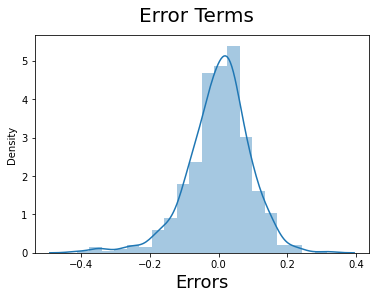

In [332]:
# Plotting a histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)      
plt.xlabel('Errors', fontsize = 18)     

#### Assumptions of linear regression verification

 - Errors terms are normally ditributed as indicated by above plot. 

## Step 7 :-  Making Predictions

#### Applying the same training data scaling on the test data

In [333]:
# Performing scaling for all the continous columns of testing data except the 'yes-no' and 'dummy' variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

# Only transform ( apply ) scaling to all numerical variables

day_test[num_vars] = minMaxScaler.transform(day_test[num_vars])

# Testing data records

day_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,nov,dec,mon,sat,sun,thur,tue,wed,cloudy,light sr
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


#### Dividing into X_test and y_test

In [334]:
y_test = day_test.pop('cnt')
X_test = day_test

In [335]:
# Using the model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test 

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable ( Intercept )

X_test_new = sm.add_constant(X_test_new)

In [336]:
# Making predictions using the trained model

y_pred = lm.predict(X_test_new)

### Calculating r sqaured value for testing data vs predicted testing data

In [337]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7955844377237249

### Calculating r sqaured value for training data vs predicted training data

In [338]:
from sklearn.metrics import r2_score

r2_score(y_train, y_train_pred)

0.8357769866151917

### Calculating MAE & RMSE for training data vs predicted training data

In [339]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print("Mean absolute error in training set :", mean_absolute_error(y_train, y_train_pred))
print("Root mean square error in training set:",np.sqrt(mean_squared_error(y_train, y_train_pred)))

Mean absolute error in training set : 0.06733690868735157
Root mean square error in training set: 0.09092560995752333


### Calculating MAE & RMSE for testing data vs predicted testing data

In [340]:
print("Mean absolute error in test set :", mean_absolute_error(y_test, y_pred))
print("Root mean square error in test set:",np.sqrt(mean_squared_error(y_test, y_pred)))

Mean absolute error in test set : 0.07598121689152798
Root mean square error in test set: 0.09853366089213506


## Final Conclusion

- Equation of our best fitted line is:

  `cnt` = <b>0.5499 × temp</b> `+` <b>0.2331 × yr </b> `+` <b>0.1318 × winter </b> `+` <b> 0.0972 × sep </b> `+`         <b>0.0874 × summer</b> `+` <b>0.0677 × sat</b> `+` <b>0.0563 × working day</b> `-` <b> 0.0813 × cloudy</b> `-` <b>   0.1552 × windspeed </b> `-` <b> 0.2880 × light sr </b>


### Top predictor variables in order of respective absolute co - effecients

- `temp ( Temperature )`&nbsp;           - <b>0.5499</b>
- `light sr ( Weather situation )`&nbsp; - <b> -0.28809</b> 
- `yr ( Year )`&nbsp;                    - <b> 0.2331</b>
- `windspeed ( Wind speed )`&nbsp;       - <b> -0.1552</b>
- `winter ( Season )`&nbsp;              - <b>0.1318</b>
- `sep ( Month )` &nbsp;                 - <b>0.0972</b>
- `summer ( Season )`&nbsp;              - <b>0.0874</b>
- `cloudy ( Weather situation )`&nbsp;   - <b>-0.0813</b>
- `sat ( Week day )`&nbsp;               - <b>0.0677</b>
- `working day ( Working day )`&nbsp;    - <b>0.0563</b>